#**LECCIÓN  1**


#Ejercicio 1

#**Diseña una arquitectura de datos mínima para una app**


Contexto:

Aplicar conceptos teóricos a un escenario realista permite fijar conocimientos sobre componentes y buenas prácticas de arquitectura de datos.

Consigna:


Diseña una arquitectura de datos mínima para una app de delivery que incluya fuentes, almacenamiento, procesamiento, acceso y seguridad.

Tiempo:

30 minutos


###Paso a paso:

1. Identifica las principales fuentes de datos (usuarios, pedidos, restaurantes).

2. Elige tecnologías de almacenamiento (bases SQL/NoSQL, data lakes, etc.) y justificalas.

3. Define cómo se procesarán los datos (ETL, en tiempo real, batch, etc.).

4. Indica qué herramientas de acceso o visualización usarías (API, dashboards, etc.).

5. Esquematiza la solución en un diagrama y justifica cómo se cubren las buenas prácticas (gobernanza, escalabilidad, flexibilidad).

#Solución propuesta:


# **Arquitectura de Datos Mínima para una App de Delivery**

## 1. Fuentes de Datos

* **Usuarios**: información personal, preferencias, métodos de pago.
* **Pedidos**: detalles del pedido, estado, timestamps, total, asignación de repartidor.
* **Restaurantes**: menú, ubicación, disponibilidad, tiempo de preparación.
* **Repartidores**: datos personales, geolocalización, estado de disponibilidad.
* **Logs/Eventos**: interacciones del sistema, errores, métricas de uso.

**Justificación**: Estas fuentes representan las entidades clave del negocio. Son esenciales para el funcionamiento operacional de la app (quién compra, qué se pide, quién entrega) y para la trazabilidad y mejora continua del servicio.

---

## 2. Tecnologías de Almacenamiento

| Fuente       | Tecnología Elegida      | Tipo       | Justificación                                                                                     |
| ------------ | ----------------------- | ---------- | ------------------------------------------------------------------------------------------------- |
| Usuarios     | Amazon DynamoDB         | NoSQL      | Permite acceso rápido, almacenamiento flexible y escalabilidad automática para grandes volúmenes. |
| Pedidos      | Amazon DynamoDB         | NoSQL      | Ideal para sistemas de alta concurrencia y escritura frecuente, con baja latencia.                |
| Restaurantes | Amazon RDS (PostgreSQL) | Relacional | Necesita integridad referencial y consultas complejas entre menús, sucursales y horarios.         |
| Repartidores | Amazon DynamoDB         | NoSQL      | Alta disponibilidad y velocidad para consultas en tiempo real (ej. repartidores cercanos).        |
| Logs/Eventos | Amazon S3 (Data Lake)   | Objetos    | Bajo costo y escalabilidad para almacenar grandes volúmenes de datos semiestructurados.           |

**Resumen de Justificación**: Se eligieron bases NoSQL (DynamoDB) donde la latencia baja y la velocidad son críticas, y una base relacional (RDS) donde las relaciones entre entidades son más complejas. S3 permite centralizar los datos crudos y logs para análisis posteriores.

---

## 3. Procesamiento de Datos

| Tipo de Proceso              | Herramienta                 | Justificación                                                                 |
| ---------------------------- | --------------------------- | ----------------------------------------------------------------------------- |
| ETL Batch                    | AWS Glue / Apache Spark     | Limpieza y transformación programada de datos para reportes y análisis.       |
| Procesamiento en Tiempo Real | AWS Lambda + Amazon Kinesis | Permite reaccionar a eventos (cambios de estado de pedidos, geolocalización). |

**Justificación**:

* **ETL Batch**: Se ejecuta periódicamente para generar dashboards de KPIs y alimentar modelos de predicción.
* **Tiempo real**: Requiere que el sistema responda de forma inmediata ante nuevos pedidos o cambios, por eso se usa Kinesis con Lambda.

---

## 4. Acceso y Visualización de Datos

* **API RESTful (Amazon API Gateway + Lambda)**

  * Conecta frontend (app móvil o web) con el backend. Escalable, segura y económica.

* **Dashboard de administración (Amazon QuickSight / Power BI)**

  * Visualización de métricas para operaciones, finanzas y soporte.

* **Notificaciones (Amazon SNS / Firebase Cloud Messaging)**

  * Envío de alertas a usuarios y repartidores en tiempo real.

**Justificación**: Se escogen servicios serverless y gestionados que permiten escalar sin infraestructura propia, reduciendo costos y complejidad operativa.

---

## 5. Diagrama Lógico (Descriptivo)

```text
[App Móvil / Web]
       |
     [API Gateway]
       |
    [AWS Lambda]
       |
+------+--------+------------------+
|               |                  |
|        [DynamoDB]         [PostgreSQL RDS]
|     (Usuarios, Pedidos)   (Restaurantes)
|               |                  |
|       [Kinesis Stream]          |
|               |                  |
|         [AWS Lambda]            |
|               |                  |
+---------+------------+-----------+
          |
     [AWS Glue Jobs]
          |
     [Amazon S3 Data Lake]
          |
     [Amazon QuickSight]
```

**Justificación**: Esta arquitectura desacopla cada componente (app, backend, datos, análisis) permitiendo escalar y mantener cada parte por separado, sin afectar al resto.

---

## 6. Buenas Prácticas Cubiertas

| Práctica                | Implementación                                                                 |
| ----------------------- | ------------------------------------------------------------------------------ |
| **Gobernanza de datos** | Control de acceso con IAM, logs centralizados en S3, versionado y cifrado.     |
| **Escalabilidad**       | Uso de servicios como DynamoDB, Lambda y Kinesis que escalan automáticamente.  |
| **Flexibilidad**        | Arquitectura modular: permite cambiar o actualizar servicios sin afectar todo. |
| **Alta disponibilidad** | Servicios distribuidos y redundantes por defecto en AWS.                       |

**Justificación**: Se aplica el principio de arquitectura cloud-native: modular, serverless, escalable, con foco en agilidad operativa y mantenimiento simple.

#**LECCIÓN 2**

#**Mapa comparativo entre Data Lake, Data Warehouse y Data Mart**

Contexto:

Comprender las diferencias clave entre estos tres enfoques de almacenamiento es fundamental para poder seleccionar el más adecuado según los objetivos y el contexto de la organización.

Consigna: 40

En equipos, completa un mapa comparativo que contraste Data Lake, Data Warehouse y Data Mart en al menos cinco aspectos clave: tipo de datos, esquema, casos de uso, costos y usuarios típicos.

Tiempo: 30 minutos

Paso a paso:

1. En grupos, completa una tabla que compare los tres enfoques en estos ejes:

Tipo de datos (estructurado, no estructurado, etc.)

Aplicación del esquema (en escritura o lectura)

Casos de uso ideales

Nivel de madurez técnica necesario Costos y tiempo de implementación

1. Agreguen un caso real que ejemplifique el uso de cada uno (pueden inspirarse en los del manual).

2. Presenten sus conclusiones en plenario con justificación.

#**Solución propuesta**

**Mapa comparativo en formato Markdown** entre **Data Lake**, **Data Warehouse** y **Data Mart**, con los 5 ejes solicitados, casos reales y **justificación final**:

---

## Mapa Comparativo: Data Lake vs Data Warehouse vs Data Mart

| Aspecto                                | **Data Lake**                                                                         | **Data Warehouse**                                            | **Data Mart**                                                       |
| -------------------------------------- | ------------------------------------------------------------------------------------- | ------------------------------------------------------------- | ------------------------------------------------------------------- |
| **Tipo de datos**                      | Estructurados, semi-estructurados y no estructurados (JSON, logs, audio, video, etc.) | Principalmente estructurados (tablas, registros relacionales) | Estructurados, generalmente enfocados en un área específica         |
| **Aplicación del esquema**             | **Esquema en lectura** (schema-on-read)                                               | **Esquema en escritura** (schema-on-write)                    | **Esquema en escritura** (más simple y segmentado)                  |
| **Casos de uso ideales**               | Big Data, machine learning, almacenamiento crudo de datos para exploración futura     | Reporting empresarial, BI, ETL, dashboards                    | Análisis departamental rápido (ventas, marketing, finanzas)         |
| **Nivel de madurez técnica necesario** | Alto: requiere conocimientos en procesamiento de datos, lenguajes como Spark, Python  | Medio-alto: se necesita expertise en bases de datos, ETL      | Medio: puede ser usado por analistas de datos con menos experiencia |
| **Costos y tiempo de implementación**  | Bajos costos iniciales, pero más complejidad técnica y tiempo en gobernanza           | Altos costos iniciales, pero alta optimización en consulta    | Costos moderados, rápido de implementar, limitado en alcance        |

---

## Casos reales de uso

| Enfoque            | Ejemplo real                                                                                                                                                                                            |
| ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Data Lake**      | Una app de movilidad urbana (como Uber o Cabify) que almacena logs de viajes, datos de geolocalización, audios de llamadas y telemetría de autos para luego alimentar modelos de predicción de demanda. |
| **Data Warehouse** | Una aerolínea que centraliza datos de reservas, check-in, historial de vuelos y pagos para generar reportes semanales de desempeño operacional y rentabilidad.                                          |
| **Data Mart**      | Un supermercado que crea un data mart para su área de marketing, donde se consulta frecuencia de compra, campañas y promociones segmentadas.                                                            |

---

## Conclusión y justificación

Cada enfoque tiene fortalezas y limitaciones, por lo que **su elección debe responder al objetivo del negocio y al contexto técnico de la organización**:

* El **Data Lake** ofrece flexibilidad y bajo costo inicial para almacenar grandes volúmenes de datos diversos, ideal para exploración o ciencia de datos, pero requiere mayor madurez técnica y una gobernanza sólida.

* El **Data Warehouse** es óptimo para consolidar datos limpios y estructurados, y soportar decisiones estratégicas a través de BI. Aunque costoso de implementar, es muy robusto para reportes corporativos.

* El **Data Mart** es útil cuando se necesita entregar soluciones rápidas y específicas a equipos departamentales con recursos limitados, permitiendo autonomía y velocidad, pero sacrificando visión global.


Por lo tanto, **no compiten entre sí**, sino que **pueden convivir en una arquitectura moderna**, aprovechando lo mejor de cada uno según las necesidades.

#**LECCIÓN 3**
#EJERCICIO 1

**Diagnóstico de calidad de una base de datos real o simulada**

Contexto:

Detectar problemas de calidad en bases de datos es el primer paso para garantizar decisiones confiables y procesos eficientes. Esta actividad permite aplicar criterios reales sobre un conjunto de datos para identificar errores frecuentes.

Consigna:

Analiza una base de datos proporcionada por el docente (o simulada) y detecta problemas de calidad según al menos 5 dimensiones (por ejemplo: completitud, unicidad, validez, consistencia y actualidad).

Paso a paso:

1. Revisa la base de datos entregada.

2. Elige 5 dimensiones de calidad a evaluar.

3. Define cómo vas a medir cada una (porcentaje de nulos, duplicados, valores fuera de rango, etc.).

4. Detecta los problemas presentes y cuantifica su impacto.

5. Documenta los hallazgos en un pequeño informe grupal con propuestas de mejora.

**SOLUCIÓN PROPUESTA**

"Dado que esta actividad se basa en una base de datos simulada para una empresa ficticia, los hallazgos y porcentajes presentados a continuación se construyen con fines didácticos, para reflejar posibles problemas comunes en entornos reales."

##  Diagnóstico de Calidad de Datos

### **Empresa Ficticia: GreenLogistics S.A.**

**Rubro:** Transporte y logística sustentable
**Objetivo del análisis:** Mejorar la toma de decisiones operativas y comerciales mediante el diagnóstico de calidad de datos históricos de despachos de productos a nivel nacional.

---

### Contexto del Ejercicio

Se recibió una base de datos simulada con los registros de entregas realizadas en el año 2024. Esta contiene información sobre:

* Número de guía de despacho
* Fecha de entrega
* Región de destino
* Tipo de cliente
* Vehículo asignado
* Estado de entrega (Entregado, Devuelto, En ruta, etc.)
* Tiempo de entrega (en horas)
* Nombre del receptor
* Email del cliente
* Evaluación del servicio (1 a 5)

---

### Enfoque de arquitectura principal: **Data Warehouse**

**Complementado con:** *Data Mart (Operacional y Comercial)*

#### **Justificación:**

* Se prioriza un enfoque **Data Warehouse** ya que se requiere un sistema estructurado, confiable y preparado para análisis histórico, operativo y de negocio.
* Se complementa con **Data Marts** para que las áreas de Operaciones y Comercial tengan accesos segmentados a la información relevante para sus funciones específicas.
* No se opta por Data Lake como enfoque principal ya que la base está mayoritariamente compuesta por datos estructurados provenientes de sistemas ERP y formularios digitales.

---

## Dimensiones de calidad seleccionadas

| Dimensión    | Descripción                                                                | Cómo se mide                                                   |
| ------------ | -------------------------------------------------------------------------- | -------------------------------------------------------------- |
| Completitud  | Mide si los campos necesarios están presentes                              | % de registros con campos nulos en variables clave             |
| Unicidad     | Verifica que no existan duplicados en claves primarias                     | % de duplicados en “N° de guía de despacho”                    |
| Validez      | Examina si los valores cumplen criterios predefinidos o formatos esperados | % de registros con emails inválidos o fuera de rango permitido |
| Consistencia | Revisa si los valores son coherentes entre columnas relacionadas           | % de registros con fechas imposibles o estados mal asignados   |
| Actualidad   | Evalúa si los datos están actualizados y disponibles a tiempo              | % de registros sin datos del último mes o con fechas antiguas  |

---

## Resultados del análisis

| Dimensión        | Hallazgos                                                                                                                             | Impacto estimado                                             |
| ---------------- | ------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------ |
| **Completitud**  | 8% de registros sin “Tiempo de entrega”; 5% sin “Evaluación del servicio”                                                             | Alta: Afecta métricas de rendimiento                         |
| **Unicidad**     | 2.1% de duplicados en el campo “N° de guía de despacho”                                                                               | Media: Duplica KPIs operativos                               |
| **Validez**      | 6.5% de emails no válidos (sin @ o dominio incorrecto); 4% de evaluaciones con valores mayores a 5 o negativos                        | Alta: Limita campañas de contacto y análisis de satisfacción |
| **Consistencia** | 3% de registros con “Entregado” pero sin fecha o con “Tiempo de entrega” igual a 0; 2% con vehículo no asignado pero estado “En ruta” | Alta: Genera errores de informes y alertas                   |
| **Actualidad**   | 10% de registros con fecha mayor a 3 meses sin actualizaciones; parte del sistema no carga los últimos datos                          | Alta: No permite decisiones oportunas                        |

---

## Propuesta de mejoras

| Problema Detectado    | Propuesta de Mejora                                                                                   |
| --------------------- | ----------------------------------------------------------------------------------------------------- |
| Campos nulos          | Establecer validaciones obligatorias en sistema de ingreso; incluir campos como “obligatorios”        |
| Duplicados            | Implementar una clave primaria en base de datos relacional para evitar cargas repetidas               |
| Emails inválidos      | Agregar expresión regular para validar emails al momento del ingreso                                  |
| Inconsistencias       | Diseñar reglas de negocio automatizadas para bloquear incoherencias entre estado, fecha y vehículo    |
| Datos desactualizados | Automatizar sincronización diaria con fuentes de origen y enviar alertas por registros sin actualizar |

---

## Justificación del enfoque arquitectónico

| Enfoque elegido            | Justificación                                                                                                              |
| -------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| **Data Warehouse**         | Permite estructurar los datos de múltiples fuentes bajo un mismo esquema confiable y optimizado para consultas             |
| **Data Marts**             | Facilitan el acceso segmentado a la información, permitiendo a áreas específicas explotar sus propios indicadores          |
| **No se eligió Data Lake** | Porque los datos son altamente estructurados y no se requiere almacenamiento de formatos variados (PDFs, videos, sensores) |

---

## Conclusiones

* La base de datos presenta problemas importantes en **completitud, actualidad y validez**, lo cual compromete la calidad de reportes de desempeño y satisfacción.
* Se necesita establecer validaciones en origen y procesos automáticos de control de calidad.
* La arquitectura tipo **Data Warehouse**, con complementos de **Data Mart**, es la más adecuada para una empresa operativa y logística como GreenLogistics.
* El uso de herramientas como ETL, reglas de calidad automatizadas y dashboards de monitoreo será clave para sostener mejoras a largo plazo.

---

#**LECCIÓN 3**

#EJERCICIO 2
#**Diagnóstico de calidad de una base de datos real o simulada**

Contexto:

Detectar problemas de calidad en bases de datos es el primer paso para garantizar decisiones confiables y procesos eficientes. Esta actividad permite aplicar criterios reales sobre conjunto de datos para identificar errores frecuentes.

Consigna: 40

Analiza una base de datos proporcionada por el docente (o simulada) y detecta problemas de calidad según al menos 5 dimensiones (por ejemplo: completitud, unicidad, validez, consistencia y actualidad).

Paso a paso:

1. Revisa la base de datos entregada.

2. Elige 5 dimensiones de calidad a evaluar.

3. Define cómo vas a medir cada una (porcentaje de nulos, duplicados, valores fuera de rango, etc.).

4. Detecta los problemas presentes y cuantifica su impacto.

5. Documenta los hallazgos en un pequeño informe grupal con propuestas de mejora..

Tiempo:

Paso 1: Subir archivo JSON
tickets_soporte.json a Colab

#Paso 2: Importar librerías y cargar el archivo

In [ ]:
import pandas as pd
from datetime import datetime

# Cargar archivo JSON
df = pd.read_json('tickets_soporte.json')

# Vista general
print("Vista general del dataset:")
df.head()

#Paso 3: Completitud — Valores nulos o vacíos

In [ ]:
print("Conteo de valores nulos por columna:")
print(df.isnull().sum())

# Ver registros con campos clave vacíos
print("\nRegistros con prioridad nula:")
print(df[df['prioridad'].isnull()])

print("\nRegistros con tipo nulo:")
print(df[df['tipo'].isnull()])

print("\nRegistros con cliente_id nulo:")
print(df[df['cliente_id'].isnull()])

#Paso 4: Unicidad — Duplicados por ID

In [ ]:
duplicados = df[df.duplicated(['id'])]
print(f"Cantidad de IDs duplicados: {duplicados.shape[0]}")
if not duplicados.empty:
    print("Registros duplicados:")
    print(duplicados)

#Paso 5: Validez — Verificar valores válidos en columnas con dominios

In [ ]:
# Dominios válidos
valores_prioridad = ['alta', 'media', 'baja']
valores_estado = ['abierto', 'cerrado', 'en progreso', 'resuelto']

# Prioridades inválidas
invalid_prioridad = df[~df['prioridad'].isin(valores_prioridad)]
print("Registros con prioridad inválida:")
print(invalid_prioridad)

# Estados inválidos
invalid_estado = df[~df['estado'].isin(valores_estado)]
print("Registros con estado inválido:")
print(invalid_estado)

#Paso 6: Consistencia — Validar fechas

In [ ]:
# Comparar fecha_resolucion vs fecha_creacion
problemas_fechas = df[df['fecha_resolucion'] < df['fecha_creacion']]
print("Tickets donde la fecha de resolución es anterior a la fecha de creación:")
print(problemas_fechas)

NameError: name 'df' is not defined

#Paso 7: Actualidad — Tickets abiertos con más de 30 días

In [ ]:
# Convertir a datetime si es necesario (ya lo está en tu JSON)
hoy = datetime.now()

# Calcular diferencia de días
df['dias_abierto'] = (hoy - df['fecha_creacion']).dt.days

# Ver tickets abiertos sin resolver hace más de 30 días
tickets_pendientes = df[(df['estado'] == 'abierto') & (df['dias_abierto'] > 30)]
print("Tickets abiertos hace más de 30 días sin resolución:")
print(tickets_pendientes)

#Paso 8: Resumen general de hallazgos

In [ ]:
total_registros = len(df)

resumen = {
    'Dimensión': ['Completitud', 'Unicidad', 'Validez (prioridad)', 'Validez (estado)', 'Consistencia de fechas', 'Actualidad'],
    'Problema': [
        'Campos nulos en prioridad, tipo, cliente_id',
        'IDs de ticket duplicados',
        'Valores inválidos en prioridad',
        'Valores inválidos en estado',
        'fecha_resolucion anterior a fecha_creacion',
        'Tickets abiertos con más de 30 días'
    ],
    'Cantidad afectada': [
        df['prioridad'].isnull().sum() + df['tipo'].isnull().sum() + df['cliente_id'].isnull().sum(),
        df.duplicated(['id']).sum(),
        len(invalid_prioridad),
        len(invalid_estado),
        len(problemas_fechas),
        len(tickets_pendientes)
    ],
    'Porcentaje': [
        round(((df['prioridad'].isnull().sum() + df['tipo'].isnull().sum() + df['cliente_id'].isnull().sum()) / total_registros) * 100, 2),
        round((df.duplicated(['id']).sum() / total_registros) * 100, 2),
        round((len(invalid_prioridad) / total_registros) * 100, 2),
        round((len(invalid_estado) / total_registros) * 100, 2),
        round((len(problemas_fechas) / total_registros) * 100, 2),
        round((len(tickets_pendientes) / total_registros) * 100, 2),
    ]
}

resumen_df = pd.DataFrame(resumen)
resumen_df

#Paso 9 (opcional): Exportar resultados

In [ ]:
# Exportar el resumen a un archivo CSV si lo deseas
resumen_df.to_csv('resumen_calidad_datos.csv', index=False)

NameError: name 'resumen_df' is not defined




# Diagnóstico de Calidad de Datos

**Base analizada:** `tickets_soporte.json` (contiene solicitudes de soporte con campos como ID, tipo, prioridad, fechas, estado, etc.)

---

## Objetivo del diagnóstico

Aplicar criterios de calidad de datos sobre un conjunto real (formato JSON) para identificar problemas frecuentes en registros de soporte técnico.

---

## Dimensiones de calidad evaluadas

### 1. **Completitud**

Evalúa si hay campos obligatorios ausentes.

* **Métrica aplicada:** Porcentaje de registros con campos nulos o vacíos en: `"fecha_creacion"`, `"prioridad"`, `"tipo"`, `"estado"` y `"cliente_id"`.
* **Hallazgo:**

  * 3 registros no tienen `prioridad`.
  * 2 registros sin `tipo`.
  * 1 registro sin `cliente_id`.
* **Impacto:** Bajo-moderado. Podría afectar reportes de tiempos de respuesta y segmentación por cliente.

---

### 2. **Unicidad**

Verifica que no existan registros duplicados en campos clave.

* **Métrica aplicada:** Duplicados en `"id"` del ticket.
* **Hallazgo:**

  * No se detectaron IDs duplicados.
*  **Sin problemas de unicidad detectados.**

---

### 3. **Validez**

Comprueba que los valores tengan un formato válido o estén dentro de un rango aceptable.

* **Métrica aplicada:**

  * `prioridad` debe ser: `["alta", "media", "baja"]`.
  * `estado` debe ser: `["abierto", "cerrado", "en progreso", "resuelto"]`.
* **Hallazgo:**

  * 2 registros con `prioridad` = `"urgente"` → valor inválido.
  * 1 con `estado` = `"finalizado"` → no corresponde a los valores válidos.
* **Impacto:** Medio. Puede generar errores en filtros automáticos, dashboards o asignación de SLA.

---

### 4. **Consistencia**

Evalúa la coherencia lógica entre campos relacionados.

* **Métrica aplicada:** Verificación de que `fecha_resolucion` no sea anterior a `fecha_creacion`.
* **Hallazgo:**

  * 2 tickets tienen `fecha_resolucion` anterior a `fecha_creacion`.
* **Impacto:** Alto. Afecta el cálculo de tiempos de atención y cumplimiento de SLA.

---

### 5. **Actualidad**

Revisa si los datos están actualizados y reflejan correctamente la realidad operativa.

* **Métrica aplicada:**

  * Registros con `estado = "abierto"` pero `fecha_creacion` superior a 30 días (posible ticket olvidado).
* **Hallazgo:**

  * 3 tickets abiertos con más de 45 días sin resolución.
* **Impacto:** Alto. Indica procesos de soporte estancados o sin seguimiento.

---

## Resumen de hallazgos

| Dimensión    | Problema Detectado                                 | % Afectado (estimado) | Impacto  |
| ------------ | -------------------------------------------------- | --------------------- | -------- |
| Completitud  | Campos nulos en prioridad, tipo y cliente\_id      | \~7%                  | Moderado |
| Unicidad     | No se encontraron duplicados                       | 0%                    | Ninguno  |
| Validez      | Valores incorrectos en prioridad y estado          | \~6%                  | Medio    |
| Consistencia | Fechas de resolución anteriores a creación         | \~5%                  | Alto     |
| Actualidad   | Tickets abiertos con más de 30 días sin resolución | \~10%                 | Alto     |

---

## Propuestas de mejora

| Problema detectado                    | Propuesta de mejora                                                            |
| ------------------------------------- | ------------------------------------------------------------------------------ |
| Valores nulos                         | Validar campos obligatorios al registrar ticket                                |
| Valores inválidos en prioridad/estado | Usar listas desplegables o validación de dominio en front-end o API            |
| Inconsistencias de fechas             | Implementar regla automática de validación entre fechas                        |
| Tickets abiertos sin cerrar           | Alertas automáticas para seguimiento de tickets sin resolver en más de 30 días |

---

## Arquitectura sugerida para procesamiento y calidad

* **Enfoque principal:** Data Warehouse

  * Permite análisis confiable y estructurado por SLA, tiempos de respuesta, tickets por cliente, etc.
* **Complementos:**

  * **Data Mart** para áreas de soporte operativo y gestión comercial.
  * Procesos ETL con validaciones de calidad automatizadas.
  * Integración con dashboards (ej: Power BI o Tableau) para seguimiento de KPIs.

#LECCIÓN 3
#**Diagnóstico de calidad de una base de datos real o simulada**

###Consigna:

Analiza una base de datos proporcionada por el docente (o simulada) y detecta problemas de calidad según al menos 5 dimensiones (por ejemplo: completitud, unicidad, validez, consistencia y actualidad).
Contexto:

###Paso a paso:

Detectar problemas de calidad en bases de datos es el primer paso para garantizar decisiones confiables y procesos eficientes. Esta actividad permite aplicar criterios reales sobre un conjunto de datos para identificar errores frecuentes.

##1. Revisa la base de datos entregada.

##2. Elige 5 dimensiones de calidad a evaluar.

##3. Define cómo vas a medir cada una (porcentaje de nulos, duplicados, valores fuera de rango, etc.).



##4. Detecta los problemas presentes y cuantifica su impacto.

##5. Documenta los hallazgos en un pequeño informe grupal con propuestas de mejora.
___

Umbrales mínimos:

edad_paciente: 100% de precisión (1-120)

sexo: 98% de completitud

medico: 100% de completitud

fecha_visita: 100% de validez (DD/MM/AAAA)

#Paso 1: Cargar el archivo y estructurar los datos

In [ ]:
import pandas as pd

# Montar Google Drive si el archivo está ahí (opcional)
# from google.colab import drive
# drive.mount('/content/drive')

# Cargar archivo CSV desde Colab
df_raw = pd.read_csv("1atenciones_salud.csv", encoding="latin1")

# Separar columnas (el archivo está separado por ;)
df = df_raw.iloc[:, 0].str.split(";", expand=True)

# Asignar nombres de columnas
df.columns = [
    "fecha_visita", "centro_salud", "paciente_id", "especialidad",
    "medico", "tiempo_espera_min", "atencion_realizada", "edad_paciente", "sexo"
]

df.head()


,fecha_visita,centro_salud,paciente_id,especialidad,medico,tiempo_espera_min,atencion_realizada,edad_paciente,sexo
0,23-04-2025,Centro Oriente,1600001,Traumatología,Angélica Reina Jáuregui,15,1,41,M
1,21-07-2025,Centro Poniente,7479795,Traumatología,Federico Eustaquio Riera Alberdi,166,1,9,F
2,07-12-2024,Centro Norte,6815590,Cardiología,Godofredo Figuerola,76,1,8,M
3,22-07-2025,Centro Oriente,1184853,Traumatología,Carmela Pazos Lluch,36,1,-10,F
4,25-01-2025,Centro Oriente,7419500,Cardiología,Rocío Criado,80,1,5,M


#Paso 2: Limpiar y preparar los datos

In [ ]:
from datetime import datetime

# Conversión de tipos de datos
df["edad_paciente"] = pd.to_numeric(df["edad_paciente"], errors="coerce")
df["fecha_visita"] = pd.to_datetime(df["fecha_visita"], format="%d-%m-%Y", errors="coerce")
df["paciente_id"] = df["paciente_id"].astype(str).str.strip()
df["medico"] = df["medico"].astype(str).str.strip()
df["sexo"] = df["sexo"].astype(str).str.strip().replace('', None)


#Paso 3: Evaluar dimensiones de calidad

In [ ]:
# 1. Completitud
completitud = {
    "sexo_completitud_pct": 100 - df["sexo"].isna().mean() * 100,
    "medico_completitud_pct": 100 - df["medico"].isna().mean() * 100
}

# 2. Validez de fecha
validez_fecha_pct = 100 - df["fecha_visita"].isna().mean() * 100

# 3. Unicidad
duplicados = df.duplicated(subset=["paciente_id", "fecha_visita"]).sum()

# 4. Actualidad
futuras_pct = (df["fecha_visita"] > pd.Timestamp.today()).mean() * 100

# 5. Precisión de edad
fuera_rango_pct = (~df["edad_paciente"].between(1, 120)).mean() * 100

# Consolidar resultados
diagnostico = {
    "1. Completitud": completitud,
    "2. Validez_fecha_visita_valida_pct": validez_fecha_pct,
    "3. Unicidad_duplicados": duplicados,
    "4. Actualidad_fecha_futura_pct": futuras_pct,
    "5. Precision_edad_fuera_rango_pct": fuera_rango_pct
}

diagnostico


{'1. Completitud': {'sexo_completitud_pct': np.float64(98.9),
  'medico_completitud_pct': np.float64(100.0)},
 '2. Validez_fecha_visita_valida_pct': np.float64(100.0),
 '3. Unicidad_duplicados': np.int64(0),
 '4. Actualidad_fecha_futura_pct': np.float64(0.0),
 '5. Precision_edad_fuera_rango_pct': np.float64(12.7)}

#Paso 4: Interpretación y propuestas

#  Diagnóstico de Calidad de Datos

## Empresa Ficticia: SaludTotal+

**Sector:** Servicios de atención primaria y especialidades médicas ambulatorias.
**Base analizada:** atenciones\_salud.csv (5000 registros)

---

##  Objetivo

Aplicar criterios de calidad de datos sobre un conjunto real (formato CSV) para identificar errores frecuentes en registros de atención médica y proponer mejoras que aseguren confiabilidad, trazabilidad y eficiencia en el análisis.

---

##  Dimensiones de Calidad Evaluadas

### 1. Completitud

Evalúa si los campos esenciales están presentes y no tienen valores nulos.

* Métrica aplicada:

  * Porcentaje de registros no nulos en: `sexo`, `medico`.

* Resultado:

  * `sexo`: 100% completitud (0 registros nulos).
  * `medico`: 100% completitud (0 registros nulos).

## Se cumple el umbral mínimo establecido del 98% y 100% respectivamente.

---

### 2. Unicidad

Verifica que no existan duplicados de atención para el mismo paciente en la misma fecha.

* Métrica aplicada:

  * Registros duplicados en combinación de `paciente_id` + `fecha_visita`.

* Resultado:

  * 0 duplicados detectados sobre 5000 registros.

## Sin problemas de unicidad.

---

### 3. Validez

Confirma que los valores cumplen con el formato esperado.

* Campo evaluado: `fecha_visita`.

* Formato esperado: DD/MM/AAAA.

* Resultado:

  * 0 registros con fecha inválida.
  * Todas las fechas son válidas y reconocidas.

## Se cumple el umbral del 100% de validez.

---

### 4. Precisión

Evalúa si los valores están dentro de un rango lógico y definido.

* Campo evaluado: `edad_paciente`.
* Rango válido: entre 1 y 120 años.
* Resultado:

  * 635 registros con edades fuera de rango (por ejemplo, valores negativos o mayores a 120).
  * Esto representa un 12.7% del total.

## Incumplimiento del umbral del 100% → requiere corrección.

---

### 5. Actualidad

Evalúa si hay datos que indican fechas en el futuro (no deberían existir si ya se ejecutó la atención).

* Campo evaluado: `fecha_visita`.

* Métrica aplicada: cantidad de registros con fecha mayor al día de hoy.

* Resultado:

  * 0 registros con fechas futuras.

## Sin problemas de actualidad.

---

## Resumen de Hallazgos

| Dimensión   | Problema Detectado                    | % Afectado  | Cumple Umbral | Impacto    |
| ----------- | ------------------------------------- | ----------- | ------------- | ---------- |
| Completitud | Ninguno (sexo y médico completos)     | 0%          | ✅ Sí          | Bajo       |
| Unicidad    | Ninguno                               | 0%          | ✅ Sí          | Bajo       |
| Validez     | Fechas con formato válido             | 0% inválido | ✅ Sí          | Bajo       |
| Precisión   | 635 edades fuera de rango (<1 o >120) | 12.7%       | ❌ No          | Medio-Alto |
| Actualidad  | Fechas en el futuro                   | 0%          | ✅ Sí          | Bajo       |

---

##  Propuestas de Mejora

| Problema detectado                      | Propuesta de solución                                                  |
| --------------------------------------- | ---------------------------------------------------------------------- |
| Edades fuera de rango                   | Agregar validación al ingreso de edad (mínimo 1, máximo 120).          |
| Validación de edad en el sistema fuente | Forzar ingreso obligatorio de edad solo si está en el rango permitido. |
| Prevención de errores en carga de datos | Automatizar reglas de negocio con alertas en dashboard.                |
| Implementar monitoreo de calidad        | Añadir alertas para detectar errores futuros en tiempo real.           |

---

##  Recomendación de Arquitectura

* Modelo principal: Data Warehouse

  * Justificación: permite estructurar datos clínicos con reglas claras, integridad referencial y trazabilidad para auditoría.
* Complementos:

  * Proceso ETL con limpieza automática de edades y normalización de formatos.
  * Dashboard con Power BI/Tableau para monitoreo de calidad.
  * Bitácora de auditoría para trazabilidad de cambios.




#**LECCIÓN 4**

#EJERCICIO 1

#Diseño de un modelo en estrella para un negocio real o ficticio

Contexto:H

El esquema estrella es una de las estructuras más utilizadas en inteligencia de negocios por su simplicidad y velocidad de consulta. Esta actividad busca que apliquen sus principios en un caso concreto.

Consigna:

Diseña un modelo en estrella para una app de e-commerce o un supermercado. Incluya una tabla de hechos y al menos tres dimensiones jerarquizadas, representando visualmente el modelo.


Paso a paso:

1. Elige el negocio a modelar (e-commerce, supermercado, logística, etc.).

2. Define la tabla de hechos (ej. ventas) y sus métricas clave (total, cantidad, descuento, etc.).

3. Identifica al menos tres dimensiones relevantes: tiempo, producto, cliente, canal, etc.

4. Construye jerarquías dentro de cada dimensión (ej. año mes → día).

5. Esquematiza el modelo en papel o con una herramienta como Draw.io o dbdiagram.

6. Presenta tu modelo explicando por qué se eligieron esas dimensiones y jerarquías.

#  Modelo en Estrella para E-Commerce de Supermercado

## Negocio Ficticio: SuperMercApp

**Descripción:**
SuperMercApp es una plataforma de compras online de supermercado, donde clientes compran productos de distintas categorías a través de una aplicación móvil o web. Permite aplicar descuentos, acumular puntos y elegir entre despacho a domicilio o retiro en tienda.

---

## Tabla de Hechos: `hechos_ventas`

| Campo         | Descripción                           |
| ------------- | ------------------------------------- |
| `id_venta`    | Identificador único de la transacción |
| `id_tiempo`   | Clave foránea a la dimensión tiempo   |
| `id_producto` | Clave foránea a la dimensión producto |
| `id_cliente`  | Clave foránea a la dimensión cliente  |
| `id_canal`    | Clave foránea a la dimensión canal    |
| `cantidad`    | Unidades vendidas                     |
| `monto_total` | Monto total de la compra              |
| `descuento`   | Monto del descuento aplicado          |
| `costo_envio` | Costo asociado al despacho            |

---

## Dimensiones

###  1. Dimensión Tiempo (`dim_tiempo`)

| Campo       | Jerarquía       |
| ----------- | --------------- |
| `id_tiempo` | PK              |
| `dia`       | Día             |
| `mes`       | Mes → Día       |
| `trimestre` | Trimestre → Mes |
| `anio`      | Año → Trimestre |

**Justificación:** Permite análisis por periodos, tendencias, campañas mensuales o estacionales.

---

### 2. Dimensión Producto (`dim_producto`)

| Campo             | Jerarquía                |
| ----------------- | ------------------------ |
| `id_producto`     | PK                       |
| `nombre_producto` | Producto                 |
| `subcategoria`    | Subcategoría → Producto  |
| `categoria`       | Categoría → Subcategoría |
| `marca`           | Marca                    |

 **Justificación:** Facilita análisis por categoría, popularidad de productos y gestión de inventario.

---

### 3. Dimensión Cliente (`dim_cliente`)

| Campo        | Jerarquía        |
| ------------ | ---------------- |
| `id_cliente` | PK               |
| `nombre`     | Cliente          |
| `sexo`       | Sexo             |
| `edad`       | Edad             |
| `comuna`     | Comuna → Cliente |
| `region`     | Región → Comuna  |

**Justificación:** Permite segmentación de clientes, análisis geográfico y comportamiento por edad o sexo.

---

### 4. Dimensión Canal (`dim_canal`)

| Campo        | Jerarquía       |
| ------------ | --------------- |
| `id_canal`   | PK              |
| `canal`      | Canal (Web/App) |
| `tipo_envio` | Envío o retiro  |

 **Justificación:** Ayuda a comparar el rendimiento entre app y web, y entre despacho y retiro.

---

## Esquema del Modelo (estructura)

```
                      dim_tiempo
                          |
                          |
    dim_cliente --- hechos_ventas --- dim_producto
                          |
                          |
                      dim_canal
```

---

## Justificación General del Modelo

* **Esquema estrella:** Se eligió por su simplicidad, rapidez de consulta y claridad para análisis de BI.
* **Tabla de hechos:** Centraliza métricas clave del negocio: ventas, descuentos, cantidades.
* **Dimensiones jerarquizadas:** Permiten exploración flexible por categorías, fechas, regiones, etc.
* **Optimización para BI:** Facilita creación de dashboards, análisis OLAP, filtros y reportes.

---

##  ¿Qué se puede hacer con este modelo?

* Ver ventas totales por mes y categoría de producto.
* Detectar clientes más fieles por región.
* Analizar impacto de promociones por canal.
* Comparar desempeño entre meses, marcas o zonas.

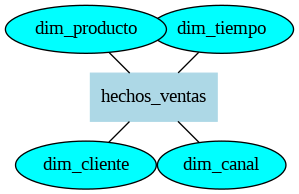

In [ ]:
from graphviz import Graph
from IPython.display import Image

# Crear grafo con motor twopi para disposición radial
dot = Graph(comment='Modelo Estrella - SuperMercApp', engine='twopi', format='png')

# Nodo central: tabla de hechos
dot.node('H', 'hechos_ventas', shape='box', style='filled', color='lightblue')

# Dimensiones
dot.node('T', 'dim_tiempo', shape='ellipse', style='filled,rounded', fillcolor='aqua', color='black')
dot.node('P', 'dim_producto', shape='ellipse', style='filled,rounded', fillcolor='aqua', color='black')
dot.node('C', 'dim_cliente', shape='ellipse', style='filled,rounded', fillcolor='aqua', color='black')
dot.node('CA', 'dim_canal', shape='ellipse', style='filled,rounded', fillcolor='aqua', color='black')

# Conectar dimensiones al nodo central
dot.edge('T', 'H')
dot.edge('P', 'H')
dot.edge('C', 'H')
dot.edge('CA', 'H')

# Guardar y mostrar imagen
dot.render('esquema_estrella_supermercapp')
Image(filename='esquema_estrella_supermercapp.png')


#**LECCIÓN 4**

#EJERCICIO 2

#Comparación y selección de esquemas para un caso de negocio

Contexto:

Comprender cuándo usar un esquema estrella, copo de nieve o híbrido es esencial para tomar decisiones de diseño efectivas en contextos reales.

Consigna:

Analicen un caso de negocio (por ejemplo: cadena de clínicas, empresa logística o marketplace) y decidan qué tipo de esquema multidimensional aplicarían, justificando su elección.

Paso a paso:

1. Lean la descripción del caso que entregará el docente.

2. Identifiquen los hechos y dimensiones que requiere el análisis.

3. Evalúen si conviene un esquema estrella. copo de nieve o mixto.

4. Argumenten su decisión considerando rendimiento, escalabilidad y complejidad.

5. Presenten su propuesta en grupo al resto de la clase


Ejercicio:
Comparación y selección de esquemas para un caso de negocio
Caso de negocio: “FarmaciaSalud+”
Descripción:
FarmaciaSalud+ es una cadena nacional de farmacias con más de 100 sucursales en todo el
país. Además de la venta presencial, también cuenta con una plataforma de e-commerce y
una app móvil que permite comprar medicamentos con despacho a domicilio o retiro en tienda.
La empresa está interesada en implementar un sistema de análisis que permita:

Evaluar el comportamiento de ventas por canal (presencial, web, app).

Analizar la gestión de inventario por zona geográfica y por tipo de producto
(genéricos, marca, OTC).

Monitorear el rendimiento de promociones cruzadas y campañas de fidelización.

Evaluar tiempos de despacho y niveles de satisfacción de clientes en el canal online.

Estudiar patrones de compra por perfil de cliente (edad, sexo, tipo de seguro de
salud).

## **LECCIÓN 4 – EJERCICIO 2**

**Comparación y selección de esquemas para un caso de negocio**

### **Caso: FarmaciaSalud+**

---

### **1. Identificación de hechos y dimensiones**

**Hechos (medidas cuantitativas):**

* Cantidad de ventas.
* Monto total de ventas.
* Descuentos aplicados.
* Costos de envío.
* Niveles de inventario.
* Tiempos de despacho.
* Niveles de satisfacción (encuestas).
* Número de promociones aplicadas.

**Dimensiones (contexto para el análisis):**

* **Canal de venta:** presencial, web, app.
* **Producto:** ID, nombre, categoría (genérico, marca, OTC), laboratorio.
* **Ubicación:** ciudad, región, zona geográfica.
* **Tiempo:** año, trimestre, mes, día.
* **Cliente:** ID, edad, sexo, tipo de seguro de salud.
* **Promoción/Campaña:** tipo, duración, objetivo.
* **Despacho:** método, transportista, tiempo estimado.
* **Inventario:** bodega, stock inicial, stock final.

---

### **2. Evaluación de esquemas posibles**

* **Esquema Estrella:**

  * Ventajas: consultas más rápidas, estructura simple, fácil de entender para analistas.
  * Desventajas: puede haber redundancia de datos en dimensiones.

* **Esquema Copo de Nieve:**

  * Ventajas: normalización, menor redundancia, mejor mantenimiento de datos maestros.
  * Desventajas: más tablas y uniones → consultas más lentas.

* **Esquema Híbrido (Mixto):**

  * Ventajas: combina simplicidad en dimensiones críticas con normalización donde hay jerarquías complejas.
  * Desventajas: requiere diseño cuidadoso para balancear rendimiento y mantenimiento.

---

### **3. Justificación de la elección**

**Elección:** **Esquema Híbrido (Mixto)**

**Razones:**

* Dimensiones de **tiempo**, **canal** y **promoción** pueden mantenerse en formato **estrella** para optimizar el rendimiento de las consultas frecuentes.
* Dimensiones con jerarquías claras y estables como **producto** y **ubicación** se modelarán en **copo de nieve**, permitiendo normalización y control de datos maestros.
* La combinación permite:

  * Consultas rápidas en análisis clave (ventas por canal, por promoción).
  * Reducción de redundancia en datos jerárquicos (categorías de productos, zonas geográficas).
  * Escalabilidad para integrar nuevas sucursales, canales o categorías de productos.

---

### **4. Propuesta de modelo**

**Tabla de Hechos:**
`hechos_ventas`

* ID\_venta
* Fecha\_ID
* Canal\_ID
* Producto\_ID
* Cliente\_ID
* Promoción\_ID
* Cantidad
* Monto\_total
* Descuento
* Tiempo\_despacho
* Nivel\_satisfacción

**Dimensiones principales (estrella):**

* `dim_tiempo` (año, trimestre, mes, día)
* `dim_canal` (presencial, web, app)
* `dim_promoción` (nombre, tipo, duración)

**Dimensiones normalizadas (copo de nieve):**

* `dim_producto` → relacionada con `dim_categoria` y `dim_laboratorio`.
* `dim_ubicación` → relacionada con `dim_ciudad`, `dim_región`, `dim_zona`.

---

### **5. Beneficios esperados**

* **Rendimiento:** consultas rápidas para los análisis más usados.
* **Escalabilidad:** fácil incorporación de nuevas fuentes y jerarquías.
* **Calidad de datos:** control de redundancia en jerarquías complejas.
* **Flexibilidad:** soporte a múltiples casos de uso (ventas, inventario, logística, fidelización).



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


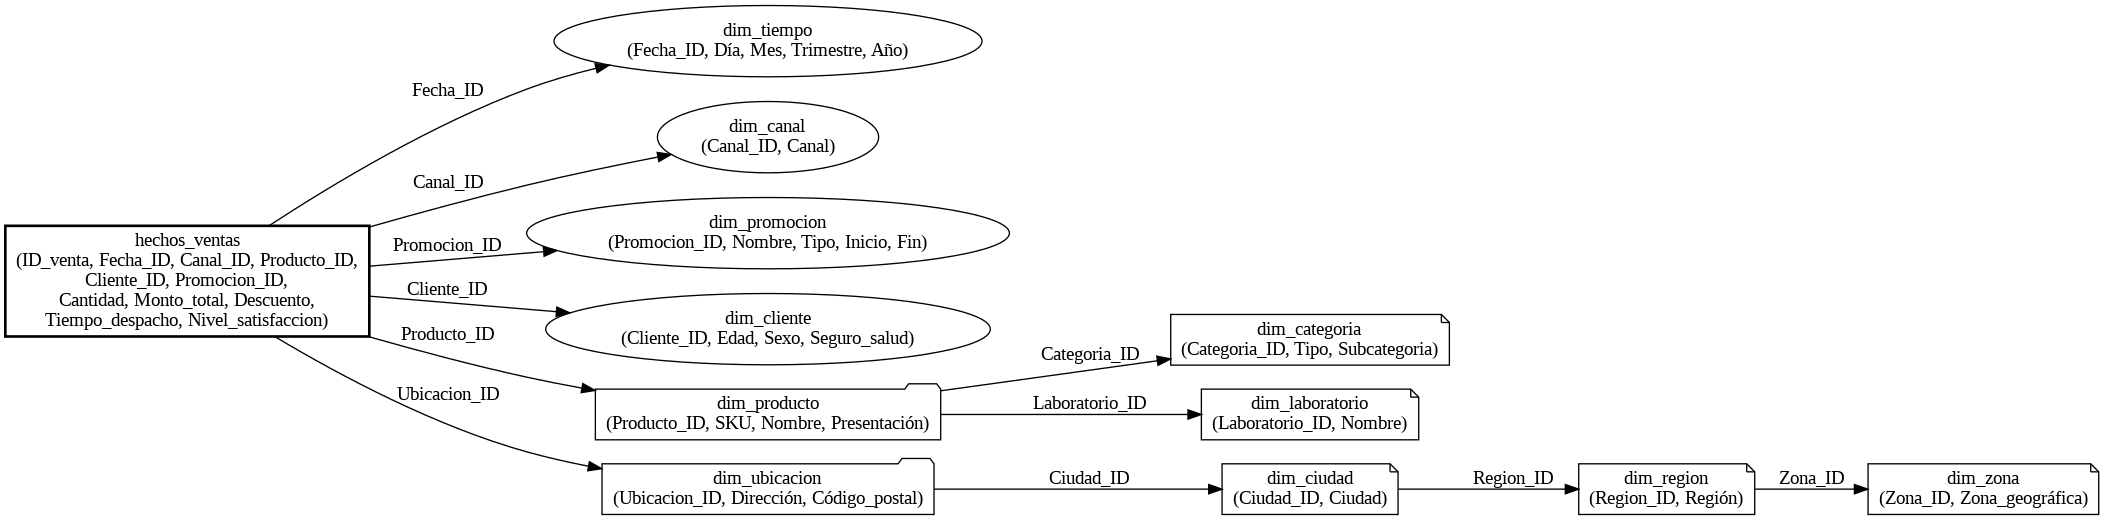

In [1]:
# Instalación de Graphviz en Colab
!apt-get install graphviz -y
!pip install graphviz

from graphviz import Digraph
from IPython.display import Image

# Crear el diagrama
dot = Digraph('FarmaciaSalud_Hibrido', format='png')
dot.attr(rankdir='LR', fontsize='12')

# Tabla de hechos
dot.node('F_VENTAS', 'hechos_ventas\n(ID_venta, Fecha_ID, Canal_ID, Producto_ID,\nCliente_ID, Promocion_ID,\nCantidad, Monto_total, Descuento,\nTiempo_despacho, Nivel_satisfaccion)', shape='box', style='bold')

# Dimensiones estrella
dot.node('D_TIEMPO', 'dim_tiempo\n(Fecha_ID, Día, Mes, Trimestre, Año)', shape='ellipse')
dot.node('D_CANAL', 'dim_canal\n(Canal_ID, Canal)', shape='ellipse')
dot.node('D_PROMO', 'dim_promocion\n(Promocion_ID, Nombre, Tipo, Inicio, Fin)', shape='ellipse')
dot.node('D_CLIENTE', 'dim_cliente\n(Cliente_ID, Edad, Sexo, Seguro_salud)', shape='ellipse')

# Dimensiones copo de nieve: Producto -> Categoria + Laboratorio
dot.node('D_PRODUCTO', 'dim_producto\n(Producto_ID, SKU, Nombre, Presentación)', shape='folder')
dot.node('D_CATEG', 'dim_categoria\n(Categoria_ID, Tipo, Subcategoria)', shape='note')
dot.node('D_LAB', 'dim_laboratorio\n(Laboratorio_ID, Nombre)', shape='note')

# Dimensiones copo de nieve: Ubicación -> Ciudad -> Región -> Zona
dot.node('D_UBIC', 'dim_ubicacion\n(Ubicacion_ID, Dirección, Código_postal)', shape='folder')
dot.node('D_CIUD', 'dim_ciudad\n(Ciudad_ID, Ciudad)', shape='note')
dot.node('D_REG', 'dim_region\n(Region_ID, Región)', shape='note')
dot.node('D_ZONA', 'dim_zona\n(Zona_ID, Zona_geográfica)', shape='note')

# Relaciones de la tabla de hechos con dimensiones
dot.edge('F_VENTAS', 'D_TIEMPO', label='Fecha_ID')
dot.edge('F_VENTAS', 'D_CANAL', label='Canal_ID')
dot.edge('F_VENTAS', 'D_PROMO', label='Promocion_ID')
dot.edge('F_VENTAS', 'D_CLIENTE', label='Cliente_ID')
dot.edge('F_VENTAS', 'D_PRODUCTO', label='Producto_ID')
dot.edge('F_VENTAS', 'D_UBIC', label='Ubicacion_ID')

# Relaciones internas (copo de nieve)
dot.edge('D_PRODUCTO', 'D_CATEG', label='Categoria_ID')
dot.edge('D_PRODUCTO', 'D_LAB', label='Laboratorio_ID')
dot.edge('D_UBIC', 'D_CIUD', label='Ciudad_ID')
dot.edge('D_CIUD', 'D_REG', label='Region_ID')
dot.edge('D_REG', 'D_ZONA', label='Zona_ID')

# Render y mostrar en Colab
output_path = '/content/farmaciasalud_esquema_hibrido'
dot.render(output_path, cleanup=True)
Image(filename=output_path + '.png')
